In [1]:
import pandas as pd
import datetime

def get_historical_data(symbol,start_date,end_date):
    
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
    url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

In [4]:
import yfinance as yf
data = yf.download('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,4.939940,5.096096,4.891391,5.072823,5.072823,633134232
2005-01-04,5.040040,5.078328,4.841842,4.867367,4.867367,549685764
2005-01-05,4.841091,4.927427,4.810561,4.842593,4.842593,329134536
2005-01-06,4.881882,4.902402,4.697698,4.718468,4.718468,415068516
2005-01-07,4.770771,4.861111,4.724224,4.851101,4.851101,386129484
...,...,...,...,...,...,...
2017-06-23,48.775002,49.331001,48.723000,49.304501,49.304501,31280000
2017-06-26,49.500000,49.699501,48.516499,48.604500,48.604500,30358000
2017-06-27,48.080002,48.361000,47.354500,47.404499,47.404499,48872000


In [5]:
data.to_csv('google.csv',index = False)

In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


       Open      High       Low     Close  Adj Close     Volume
0  4.939940  5.096096  4.891391  5.072823   5.072823  633134232
1  5.040040  5.078328  4.841842  4.867367   4.867367  549685764
2  4.841091  4.927427  4.810561  4.842593   4.842593  329134536
3  4.881882  4.902402  4.697698  4.718468   4.718468  415068516
4  4.770771  4.861111  4.724224  4.851101   4.851101  386129484


Open   --- mean : 19.115236573454307   	 Std:  10.66293023295447   	 Max:  50.27450180053711   	 Min:  4.386887073516846
High   --- mean : 19.282561735507983   	 Std:  10.718758584827409   	 Max:  50.43050003051758   	 Min:  4.46446418762207
Low    --- mean : 18.926628135838836   	 Std:  10.592980932486052   	 Max:  49.83100128173828   	 Min:  4.318569183349609
Close  --- mean : 19.107250592515275   	 Std:  10.660974020075304   	 Max:  50.2140007019043   	 Min:  4.379128932952881
Volume --- mean : 157408524.48585054   	 Std:  160104731.52786216   	 Max:  1643023332   	 Min:  10412000


In [7]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item       Open      Close    Volume
0     0  47.567501  46.890999  64134000
1     1  47.533001  48.050499  54912000
2     2  48.080002  47.404499  48872000
3     3  49.500000  48.604500  30358000
4     4  48.775002  49.304501  31280000
---
      Item      Open     Close     Volume
3140  3140  4.770771  4.851101  386129484
3141  3141  4.881882  4.718468  415068516
3142  3142  4.841091  4.842593  329134536
3143  3143  5.040040  4.867367  549685764
3144  3144  4.939940  5.072823  633134232


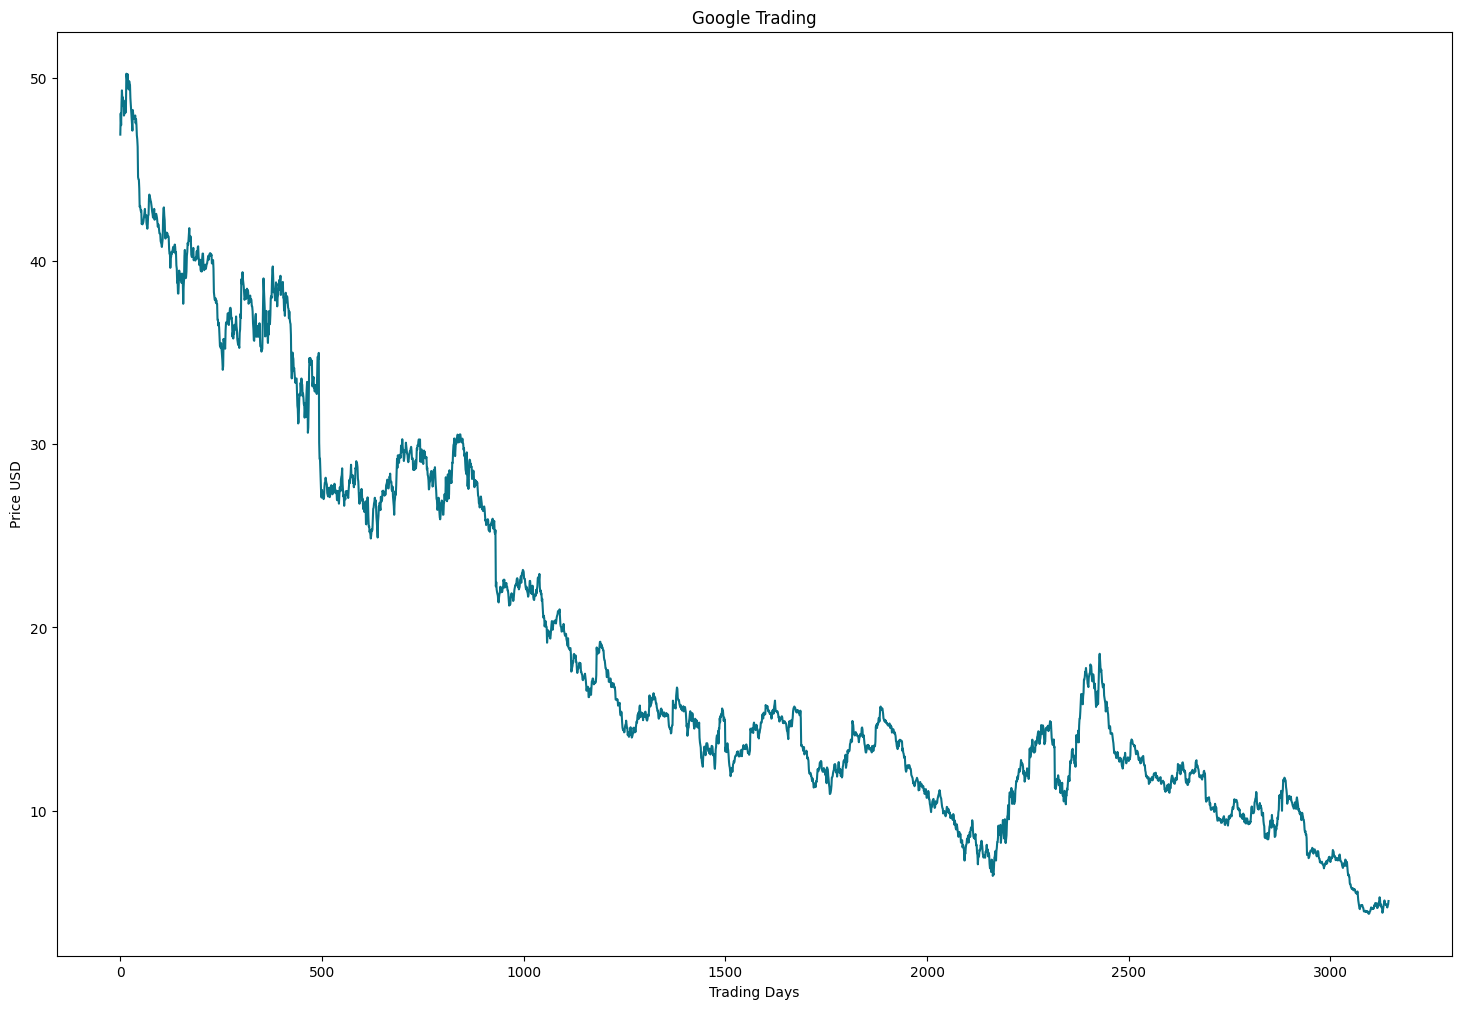

In [8]:
import visualize

visualize.plot_basic(stocks)

In [9]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.941008  0.927501  0.032906
1     1  0.940256  0.952798  0.027257
2     2  0.952177  0.938704  0.023557
3     3  0.983122  0.964885  0.012217
4     4  0.967322  0.980157  0.012782


Open   --- mean : 0.32096568077365945   	 Std:  0.23237054914244115   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.3213300504865651   	 Std:  0.2325952622670379   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.09003767253396143   	 Std:  0.0980666545611495   	 Max:  1.0   	 Min:  0.0


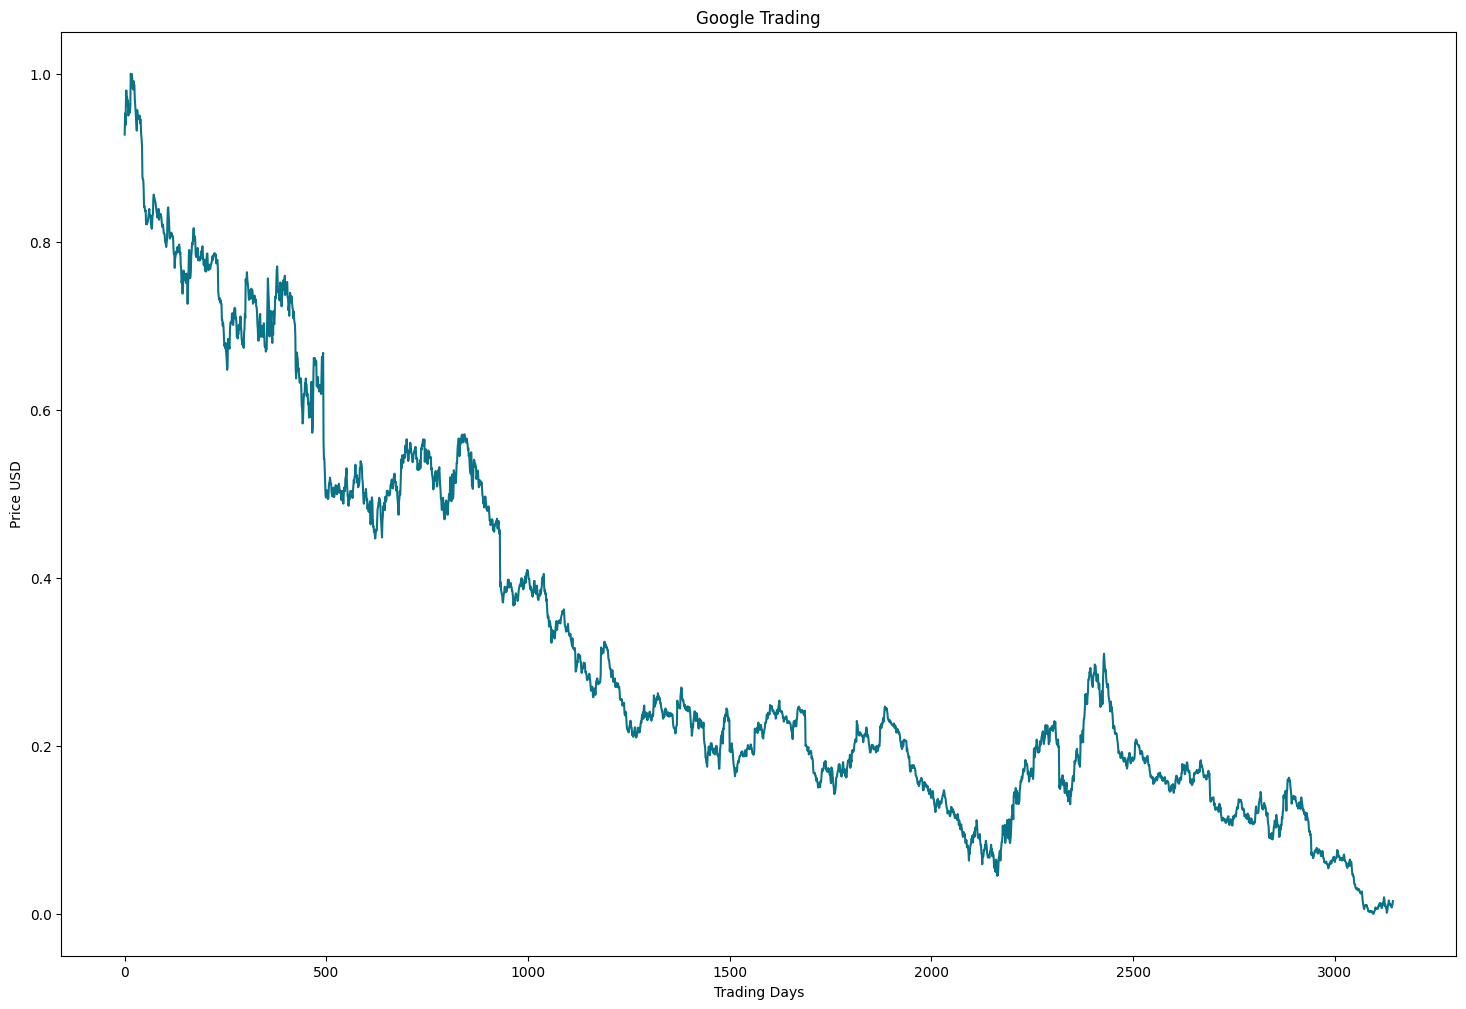

In [10]:
visualize.plot_basic(stocks)

In [11]:
stocks.to_csv('google_preprocessed.csv',index= False)

In [12]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.941008,0.927501,0.032906
1,1,0.940256,0.952798,0.027257
2,2,0.952177,0.938704,0.023557
3,3,0.983122,0.964885,0.012217
4,4,0.967322,0.980157,0.012782


In [13]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2155, 1)
y_train (2155, 1)
x_test (990, 1)
y_test (990, 1)


In [14]:
model = LinearRegressionModel.build_model(X_train,y_train)

In [15]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

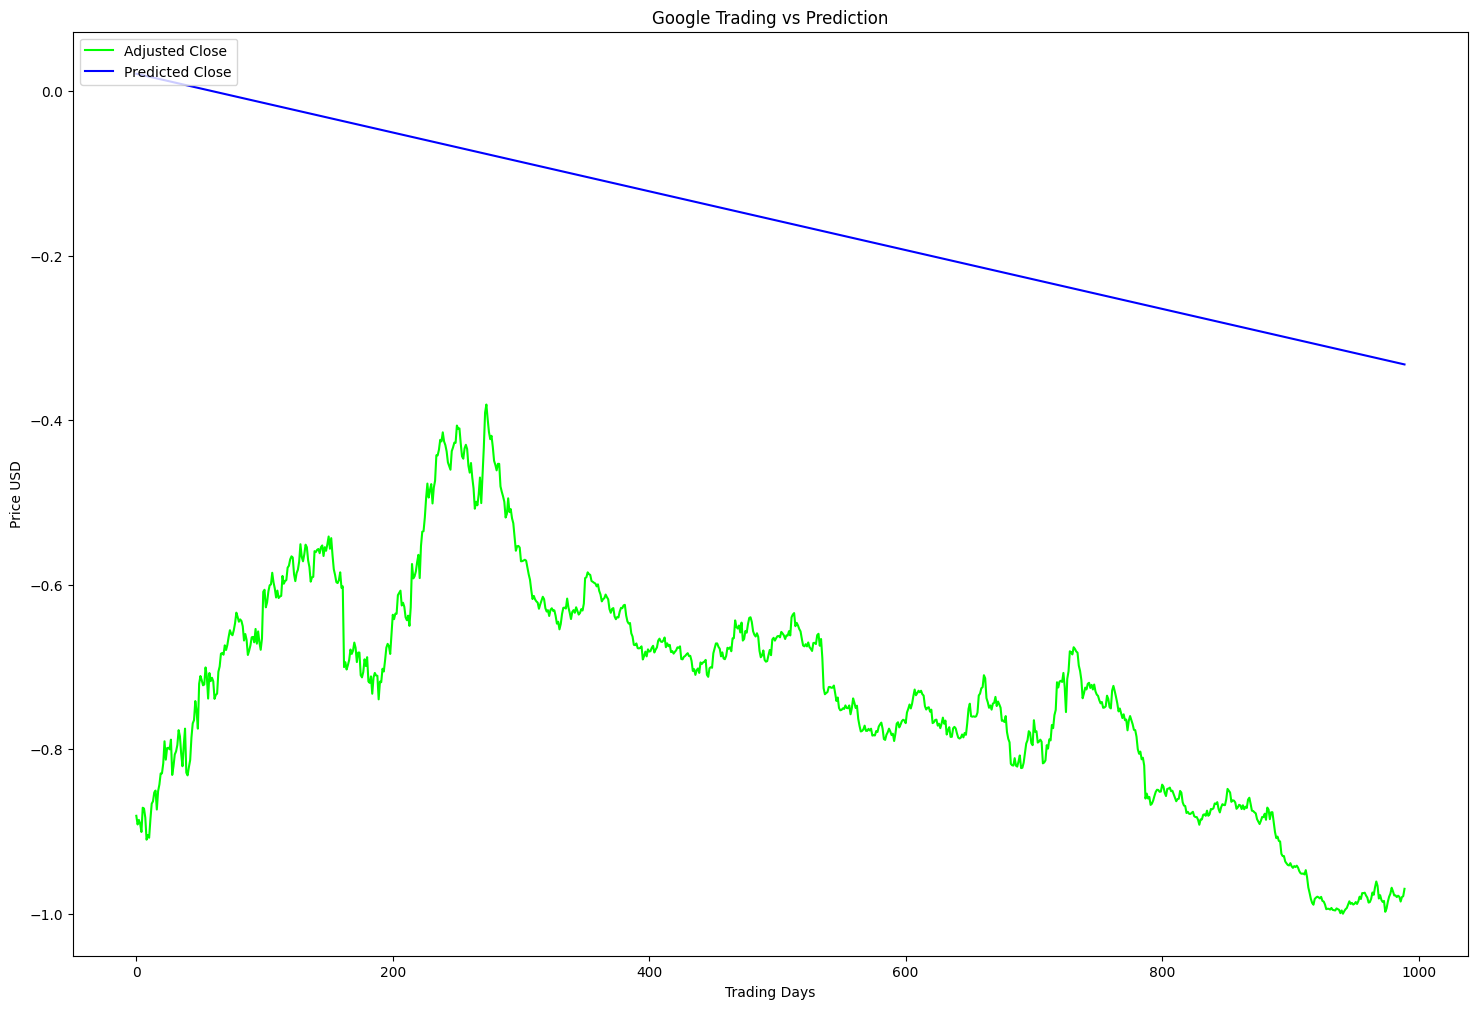

In [16]:
vs.plot_prediction(y_test,predictions)

In [17]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7406 MSE (0.8606 RMSE)
Test Score: 0.33573321 MSE (0.57942490 RMSE)


In [22]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM  # Corrected import statement
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time  # Assuming these modules are defined elsewhere

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis=1)

display(stocks_data.head())


,Open,Close,Volume
0,0.941008,0.927501,0.032906
1,0.940256,0.952798,0.027257
2,0.952177,0.938704,0.023557
3,0.983122,0.964885,0.012217
4,0.967322,0.980157,0.012782


In [27]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].values
    y_train = stocks[prediction_time:-test_data_cut]['Close'].values
    x_test = stocks[0 - test_data_cut:-prediction_time].values
    y_test = stocks[prediction_time - test_data_cut:]['Close'].values
    return x_train, x_test, y_train, y_test
def unroll(data, sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)
X_train, X_test, y_train, y_test = train_test_split_lstm(stocks_data, 5)
unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


In [28]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.006136655807495117


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0269 - val_loss: 1.1211e-04


In [30]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


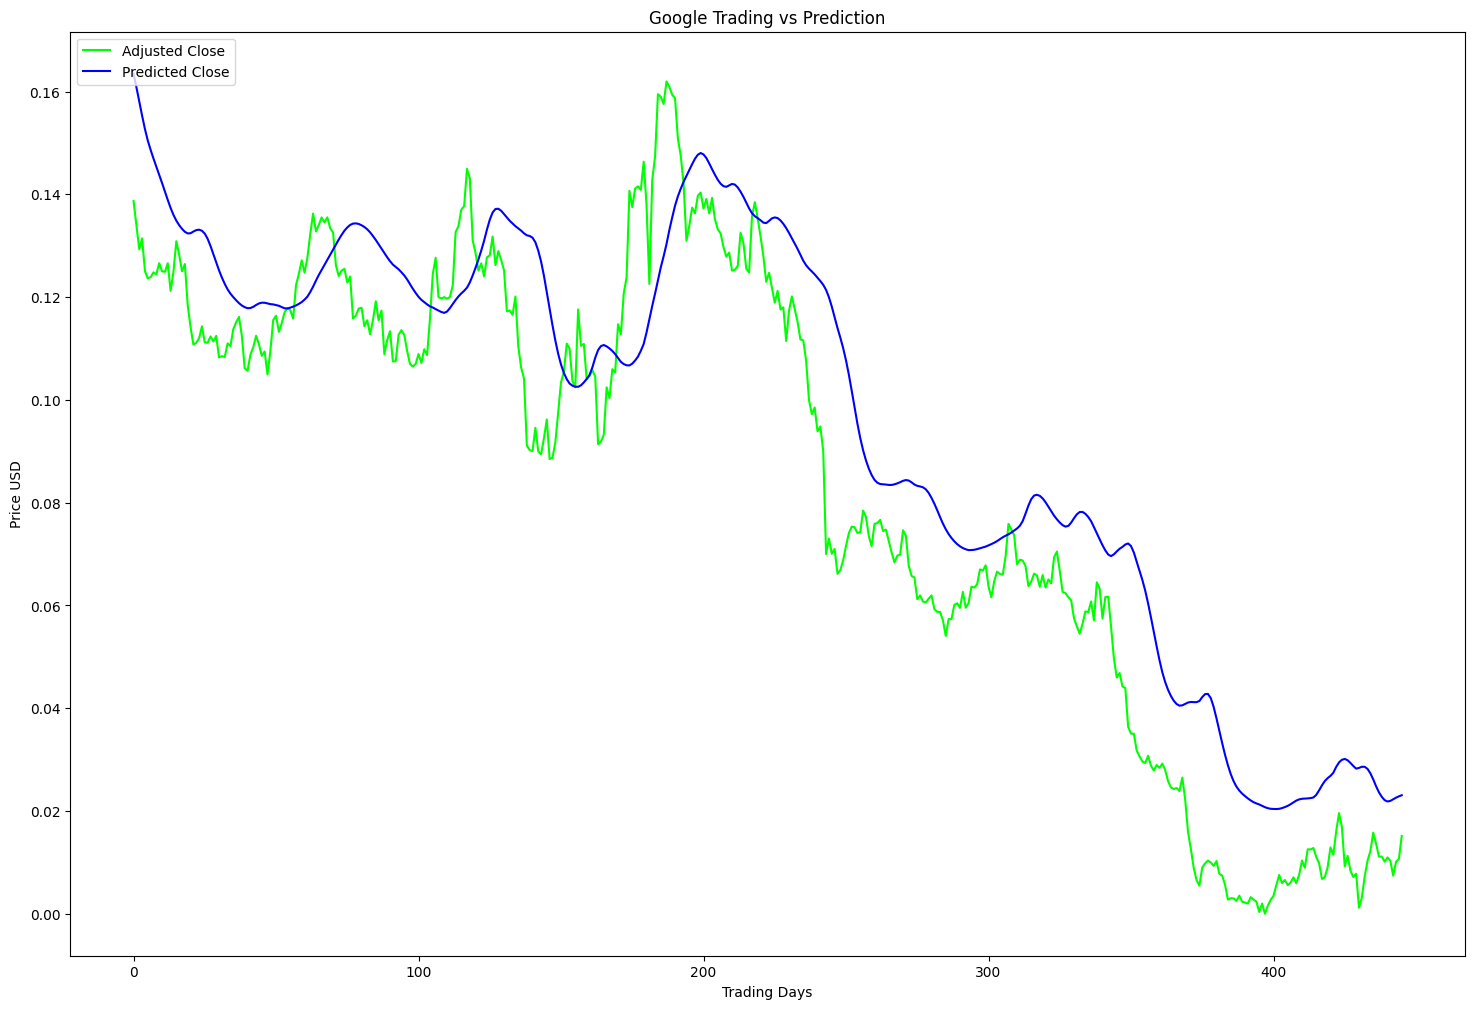

In [31]:
vs.plot_lstm_prediction(y_test,predictions)

In [32]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00050659 MSE (0.02250762 RMSE)
Test Score: 0.00034422 MSE (0.01855316 RMSE)


In [33]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.003683328628540039


In [34]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5


25/25 - 4s - 154ms/step - loss: 0.0227 - val_loss: 0.0012
Epoch 2/5
25/25 - 1s - 59ms/step - loss: 0.0020 - val_loss: 3.5266e-04
Epoch 3/5
25/25 - 1s - 59ms/step - loss: 0.0013 - val_loss: 1.0173e-04
Epoch 4/5
25/25 - 3s - 103ms/step - loss: 0.0014 - val_loss: 1.0793e-04
Epoch 5/5
25/25 - 1s - 58ms/step - loss: 0.0013 - val_loss: 8.8449e-05


In [35]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


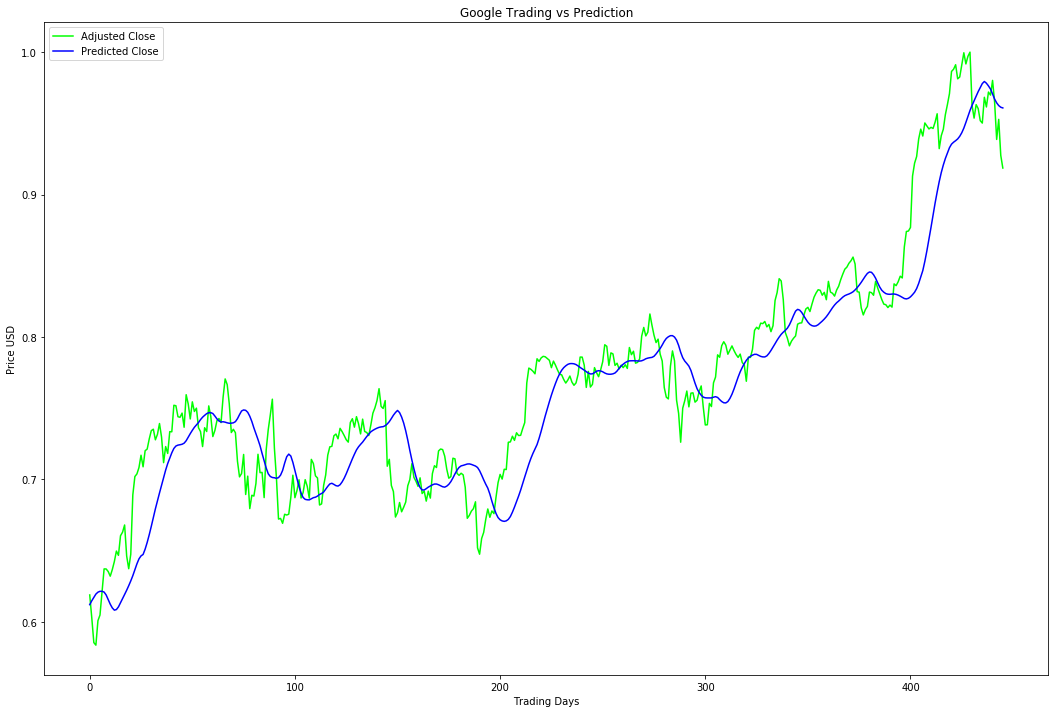

In [50]:
vs.plot_lstm_prediction(y_test,predictions)

In [36]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00049133 MSE (0.02216588 RMSE)
Test Score: 0.00018302 MSE (0.01352842 RMSE)


In [37]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.000183 - RMSE * Adjusted Close Range
